In [24]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
os.chdir('/Users/karishmavelagaleti/Documents/DataScience.nosync/IMDB_dataset.nosync/')

In [8]:
df1 = pd.read_csv('data.tsv', sep='\t')
df1.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1901
1,tt0000002,5.9,254
2,tt0000003,6.5,1694
3,tt0000004,5.7,166
4,tt0000005,6.2,2510


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253462 entries, 0 to 1253461
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   tconst         1253462 non-null  object 
 1   averageRating  1253462 non-null  float64
 2   numVotes       1253462 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 28.7+ MB


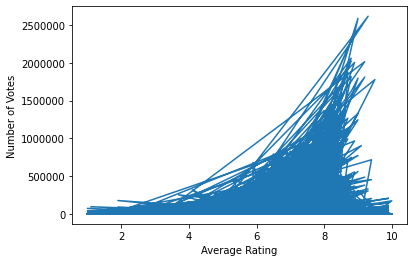

In [33]:
x = df1['averageRating']
y=df1['numVotes']

fig, ax = plt.subplots()
ax.plot(x,y)
plt.xlabel("Average Rating")
plt.ylabel('Number of Votes')
ax.ticklabel_format(style='plain')
plt.show()


In [7]:
df2 = pd.read_csv('data-2.tsv', sep='\t')
df2.head()

,tconst,parentTconst,seasonNumber,episodeNumber
0,tt0020666,tt15180956,1,2
1,tt0020829,tt15180956,1,1
2,tt0021166,tt15180956,1,3
3,tt0021612,tt15180956,2,2
4,tt0021655,tt15180956,2,5


In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6847882 entries, 0 to 6847881
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tconst         object
 1   parentTconst   object
 2   seasonNumber   object
 3   episodeNumber  object
dtypes: object(4)
memory usage: 209.0+ MB


In [9]:
df3 = pd.read_csv('data-3.tsv', sep='\t')
df3.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9099384 entries, 0 to 9099383
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   tconst     object
 1   directors  object
 2   writers    object
dtypes: object(3)
memory usage: 208.3+ MB


In [10]:
df4 = pd.read_csv('data-4.tsv', sep='\t')
df4.head()

/Users/karishmavelagaleti/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [17]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9099384 entries, 0 to 9099383
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   tconst          object
 1   titleType       object
 2   primaryTitle    object
 3   originalTitle   object
 4   isAdult         object
 5   startYear       object
 6   endYear         object
 7   runtimeMinutes  object
 8   genres          object
dtypes: object(9)
memory usage: 624.8+ MB


In [11]:
df5 = pd.read_csv('data-5.tsv', sep='\t')
df5.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0031983,tt0053137,tt0072308,tt0050419"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0071877,tt0037382,tt0117057"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0056404,tt0049189,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0077975,tt0072562"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0083922,tt0060827,tt0050976"


In [18]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11804374 entries, 0 to 11804373
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 540.4+ MB


In [12]:
df6 = pd.read_csv('data-6.tsv', sep='\t')
df6.head()

/Users/karishmavelagaleti/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


In [19]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32641536 entries, 0 to 32641535
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   titleId          object
 1   ordering         int64 
 2   title            object
 3   region           object
 4   language         object
 5   types            object
 6   attributes       object
 7   isOriginalTitle  object
dtypes: int64(1), object(7)
memory usage: 1.9+ GB


In [13]:
df7 = pd.read_csv('data-7.tsv', sep='\t')
df7.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [20]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51327648 entries, 0 to 51327647
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   ordering    int64 
 2   nconst      object
 3   category    object
 4   job         object
 5   characters  object
dtypes: int64(1), object(5)
memory usage: 2.3+ GB


In [21]:
len(df7)

51327648